### Импорт библиотек и датасетов

In [129]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [130]:
users = pd.read_csv('users.tsv',sep='\t')
history = pd.read_csv('history.tsv',sep='\t')
validate = pd.read_csv('validate.tsv',sep='\t')
validate_answers = pd.read_csv('validate_answers.tsv',sep='\t')

### Инфо

In [131]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  27769 non-null  int64
 1   sex      27769 non-null  int64
 2   age      27769 non-null  int64
 3   city_id  27769 non-null  int64
dtypes: int64(4)
memory usage: 867.9 KB


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


In [132]:
history.info()
history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147857 entries, 0 to 1147856
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   hour       1147857 non-null  int64  
 1   cpm        1147857 non-null  float64
 2   publisher  1147857 non-null  int64  
 3   user_id    1147857 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 35.0 MB


,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [133]:
validate.info()
validate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.4+ KB


,cpm,hour_start,hour_end,publishers,audience_size,user_ids
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."


In [134]:
validate_answers.info()
validate_answers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   at_least_one    1008 non-null   float64
 1   at_least_two    1008 non-null   float64
 2   at_least_three  1008 non-null   float64
dtypes: float64(3)
memory usage: 23.8 KB


,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270


### Визуализация

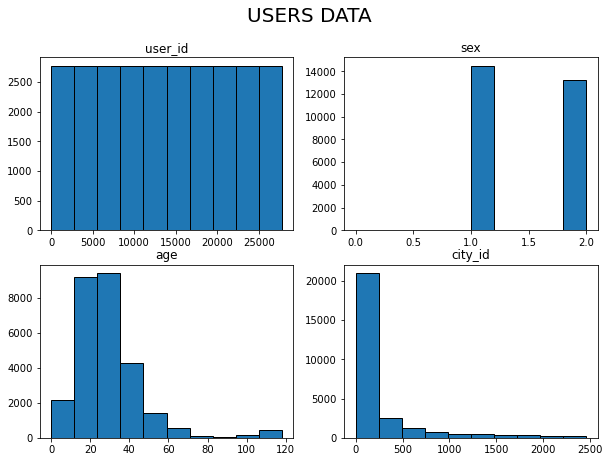

In [135]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('USERS DATA', fontsize = 20)

for i in range(len(users.columns)):
    plt.subplot(2,2,i+1)
    plt.title(users.columns[i])
    plt.hist(users[users.columns[i]], edgecolor='black')


plt.show()

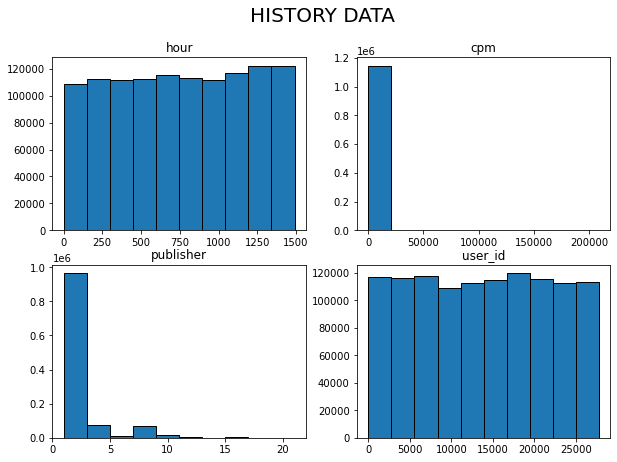

In [136]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('HISTORY DATA', fontsize = 20)

for i in range(len(history.columns)):
    plt.subplot(2,2,i+1)
    plt.title(history.columns[i])
    plt.hist(history[history.columns[i]], edgecolor='black')

plt.show()

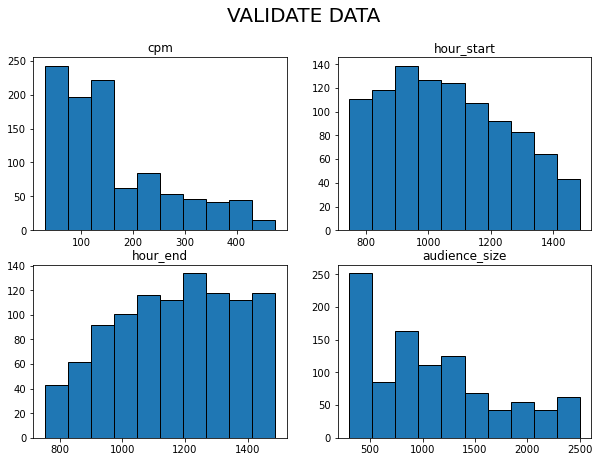

In [137]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('VALIDATE DATA', fontsize = 20)

validate_vis = validate.drop(['publishers','user_ids'],axis=1) # Эти 2 колонки содержат списки, не уверен, как их визуализировать

for i in range(len(validate_vis.columns)):
    plt.subplot(2,2,i+1)
    plt.title(validate_vis.columns[i])
    plt.hist(validate_vis[validate_vis.columns[i]], edgecolor='black')

plt.show()

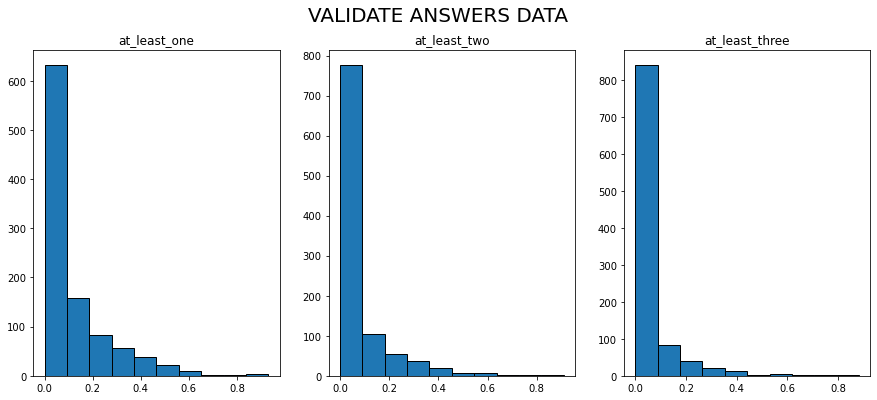

In [138]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.suptitle('VALIDATE ANSWERS DATA', fontsize = 20)

for i in range(len(validate_answers.columns)):
    plt.subplot(1,3,i+1)
    plt.title(validate_answers.columns[i])
    plt.hist(validate_answers[validate_answers.columns[i]], edgecolor='black')

plt.show()

### Корреляция validate и validate_answers

#### Выделение, преобразование и удаление признаков

Для удобства обозначений

In [139]:
X = validate.copy()
Y = validate_answers.copy()

Выделение

In [140]:
X.insert(len(X.columns),
         'delay',
         X['hour_end']-X['hour_start'])

In [141]:
# Вытаскиваем фичи по пользователям

no_sex_prop = []
no_age_prop = []

age_mean = []
age_std = []
city_count = []

users_features = pd.DataFrame(columns=[
    'no_sex_prop',
    'no_age_prop',
    'age_mean',
    'age_median',
    'age_std',
    'city_count'
])

for index, row in X.iterrows():
    
    users_info = users[
        users['user_id'].isin(
            [ int(i) for i in row['user_ids'].split(',')]
        )
    ]

    users_features.loc[index] = [
        (users_info['sex'] == 0).sum() / row['audience_size'], # no_sex_prop
        (users_info['age'] == 0).sum() / row['audience_size'], # no_age_prop
        users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].mean(), # age_mean
        users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].median(), # age_median
        users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].std(), # age_std
        len(users_info['city_id'].unique()) # city_count
    ]

X = pd.concat([X, users_features], axis=1)

In [142]:
# вытаскиваем фичи по publishers

publishers_amount = 21

publishers_features = pd.DataFrame(columns=['p'+str(i) for i in range(1,publishers_amount+1)])

for index, row in X.iterrows():
    
    publishers = [int(i) for i in row['publishers'].split(',')]
    
    publishers_features.loc[index] = [int(i in publishers) for i in range(1,publishers_amount+1)]

X = pd.concat([X, publishers_features], axis=1)

Преобразование

In [143]:
for column in X.columns: 
    if column in ['publishers', 'user_ids']:
        continue
    X[column] = (X[column] - X[column].mean()) / X[column].std() 

In [144]:
from sklearn.decomposition import PCA

X[['pca1','pca2']] = PCA(2).fit_transform(X[['city_count', 'audience_size']])

In [145]:
X['publishers_count'] = X['publishers'].apply(lambda s: s.count(','))

Удаление

In [ ]:
#X = X.drop(['hour_end', 'hour_start', 'publishers', 'user_ids', 'city_count', 'audience_size', 'age_std', 'publishers_count'] + [('p'+str(i)) for i in range(3,22)], axis = 1)

Формируем общий датафрейм для удобства

In [146]:
df = pd.concat([X, Y], axis = 1)

#### Матрицы

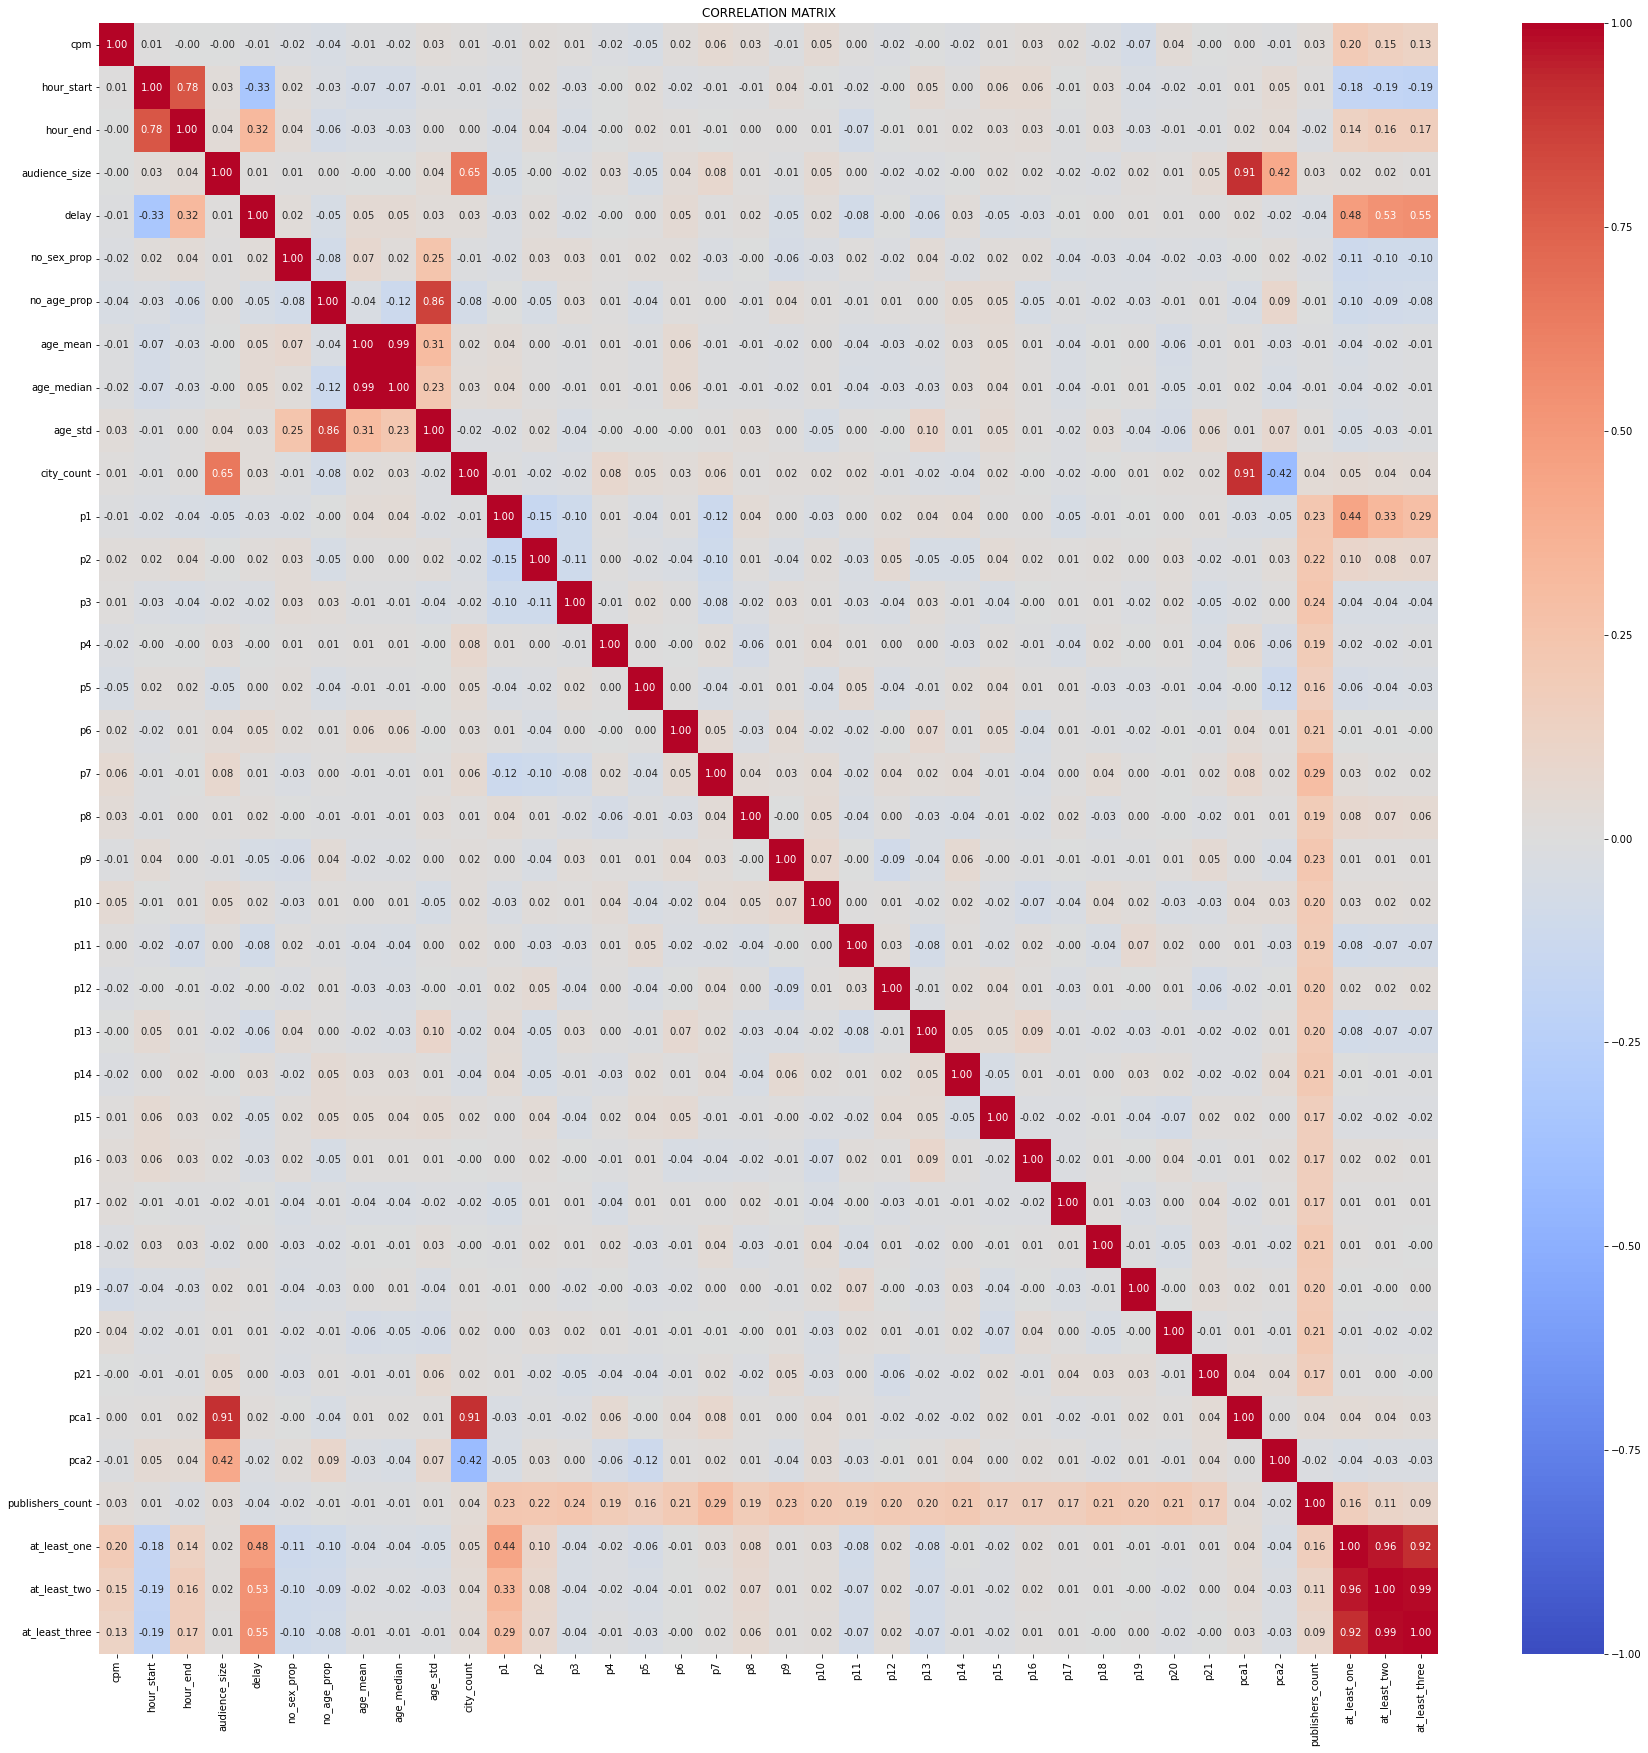

In [147]:
f = plt.figure(facecolor='white')
f.set_figwidth(30)
f.set_figheight(30)

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('CORRELATION MATRIX')
plt.show()

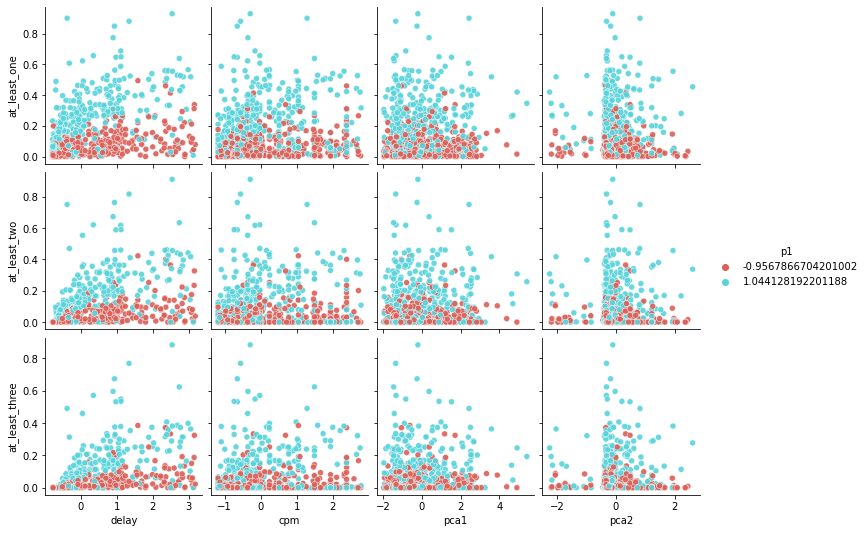

In [148]:
pp = sns.pairplot(df,
             x_vars = ['delay','cpm', 'pca1', 'pca2'],
             y_vars = ['at_least_one', 'at_least_two', 'at_least_three'],
             hue='p1',
             plot_kws = dict(alpha = 0.9),
             height = 2.5,
             palette=sns.color_palette("hls", 2))
#pp.map(sns.regplot, scatter = False)
plt.show()

### Черновая модель

In [149]:
X = X.drop(['publishers','user_ids'], axis=1)

In [150]:
from metrics import get_smoothed_mean_log_accuracy_ratio

def get_metric_for_ndarray(y_true, y_predicted):
    ans = get_smoothed_mean_log_accuracy_ratio(
        pd.DataFrame((y_true>=0) * y_true, columns=validate_answers.columns),
        pd.DataFrame((y_predicted>=0) * y_predicted, columns=validate_answers.columns)
    )
    return ans

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
X_train = X_train.fillna(0)
normalizer_x = StandardScaler().fit(X_train)
X_train = normalizer_x.transform(X_train)


In [152]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import MultiTaskElasticNet

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {
    'alpha' : [0.001, 0.005, 0.008, 0.01, 0.03, 0.05, 0.1, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 3, 5, 8, 10, 20, 50, 100],
    'l1_ratio' : [0.001, 0.01,0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999, 1],
    'max_iter' : [10000]
}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
model = GridSearchCV(MultiTaskElasticNet(),
                     alpha_values,
                     scoring=make_scorer(get_metric_for_ndarray, greater_is_better=False),
                     #scoring='explained_variance',
                     cv=15)

res = model.fit(X_train, Y_train.values)

# обучение модели 
print('Лучшее значение alpha:', res.best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', res.best_score_)

Лучшее значение alpha: {'alpha': 0.03, 'l1_ratio': 0.5, 'max_iter': 10000}
Метрика качества: -138.654


Переназначаем индексы для корректной работы метрики

In [153]:
Y_train = Y_train.reset_index(drop=True)

In [154]:
preds = pd.DataFrame(model.predict(X_train),columns=validate_answers.columns)
preds = (preds>0)*preds

print('train result', get_smoothed_mean_log_accuracy_ratio( Y_train, preds))

train result 136.81


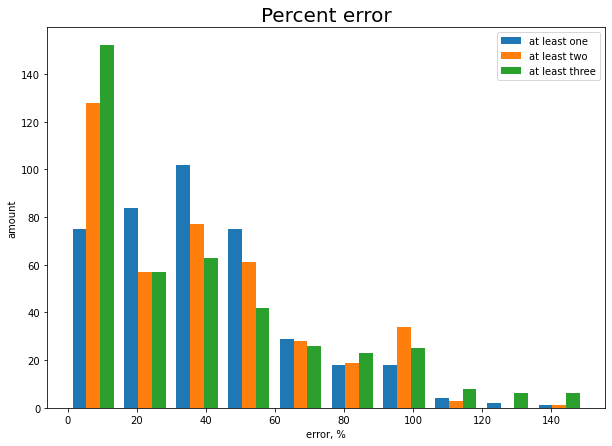

In [155]:
f = plt.figure(facecolor='white')
f.set_figwidth(10)
f.set_figheight(7)

plt.title('Percent error', fontsize = 20)
plt.xlabel('error, %')
plt.ylabel('amount')

ae = (Y_train - preds).abs()
pe = ae/(Y_train+0.0001)*100
plt.hist(pe[((pe<150)).all(axis=1)], bins=10)
plt.legend(['at least one', 'at least two', 'at least three'])
plt.show()

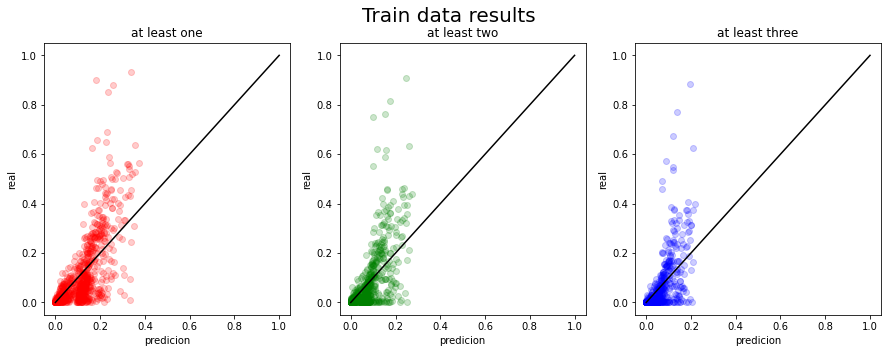

In [156]:
f = plt.figure(facecolor='white')
f.set_figwidth(15)
f.set_figheight(5)

plt.suptitle('Train data results', fontsize = 20)
plt.subplot(1,3,1)
plt.scatter(preds['at_least_one'], Y_train['at_least_one'], color='r', alpha=0.2,)
plt.title('at least one')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,2)
plt.scatter(preds['at_least_two'], Y_train['at_least_two'], color='g', alpha=0.2)
plt.title('at least two')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,3)
plt.scatter(preds['at_least_three'], Y_train['at_least_three'], color='b', alpha=0.2)
plt.title('at least three')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.show()

In [157]:
preds_test = pd.DataFrame(
        model.predict(normalizer_x.transform(X_test.fillna(0))
    ), columns=validate_answers.columns
)
preds_test = (preds_test>0)*preds_test
Y_test = Y_test.reset_index(drop=True)

print('test result:',get_smoothed_mean_log_accuracy_ratio(Y_test, preds_test))

test result: 140.19


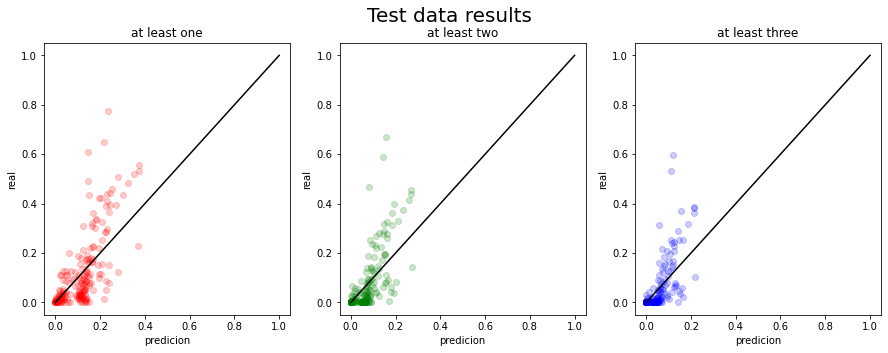

In [158]:
f = plt.figure(facecolor='white')
f.set_figwidth(15)
f.set_figheight(5)

plt.suptitle('Test data results', fontsize = 20)

plt.subplot(1,3,1)
plt.scatter(preds_test['at_least_one'], Y_test['at_least_one'], color='r', alpha=0.2,)
plt.title('at least one')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,2)
plt.scatter(preds_test['at_least_two'], Y_test['at_least_two'], color='g', alpha=0.2)
plt.title('at least two')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,3)
plt.scatter(preds_test['at_least_three'], Y_test['at_least_three'], color='b', alpha=0.2)
plt.title('at least three')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.show()

In [ ]:
model.best_estimator_.coef_

array([[ 0.01447752,  0.06152219, -0.00581279, -0.        ,  0.05511276,
         0.00940001,  0.        , -0.        ],
       [ 0.00922633,  0.05428284, -0.00439838, -0.        ,  0.03372388,
         0.0060759 ,  0.        , -0.        ],
       [ 0.00693137,  0.04669395, -0.00370037, -0.        ,  0.02426512,
         0.00427682,  0.        , -0.        ]])